In [14]:
import json
import pandas as pd
# Opening JSON file
f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# returns JSON object as
# a dictionary
data = json.load(f)
df = pd.DataFrame.from_dict(data)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

In [16]:
# df['firstKeyword'] = df['keywords'].apply(lambda x: x[0]['name'] if len(x) != 0 else None)
# #df['secondKeyword'] = df['keywords'].apply(lambda x: x[1]['name'] if len(x) > 1 else None)
# #df['thirdKeyword'] = df['keywords'].apply(lambda x: x[2]['name'] if len(x) > 2 else None)
# #df['fourthKeyword'] = df['keywords'].apply(lambda x: x[3]['name'] if len(x) > 3 else None)

# df['cleanFocusCategory'] = df['thematicFocusCategory'].apply(lambda x: x['name'] if x is not None else x)

# #df = df[['firstKeyword', 'secondKeyword', 'thirdKeyword', 'fourthKeyword', 'thematicFocusCategory', 'cleanFocusCategory']]

# df = df[['firstKeyword', 'keywordStrings', 'cleanFocusCategory']]

# df_clean = df.copy()
# df_clean = df_clean.dropna()
# df_clean['cleanKeywordStrings'] = [' '.join(map(str, l)) for l in df_clean['keywordStrings']]



In [17]:
# tfidf_first = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
# features_first = tfidf_first.fit_transform(df_clean['firstKeyword'])
# labels_first = df_clean['cleanFocusCategory']
# features_first.shape

In [18]:
# #category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
# model = LinearSVC()
# X_train_first, X_test_first, y_train_first, y_test_first, indices_train_first, indices_test_first = train_test_split(features_first, labels_first, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
# model.fit(X_train_first, y_train_first)
# y_pred_first = model.predict(X_test_first)
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test_first, y_pred_first)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test_first,y_pred_first)

In [19]:
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words='english')
# features = tfidf.fit_transform(df_clean['cleanKeywordStrings'])
# features_test = tfidf.fit_transform(df_clean['firstKeyword'])
# labels = df_clean['cleanFocusCategory']
# features_test.shape

In [20]:
# #category_id_df = df_clean['cleanFocusCategory'].drop_duplicates().sort_values()
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df_clean.index, test_size=0.33, random_state=0,stratify=labels)
# model.fit(X_train, y_train)
# X_test_firstkey = tfidf.transform(df_clean['firstKeyword'][indices_test])
# y_pred = model.predict(X_test_firstkey)
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, y_pred)

In [21]:
#tfidf.get_feature_names()

In [22]:
# model = LinearSVC()
# X_train_first, X_test_first, y_train_first, y_test_first, indices_train_first, indices_test_first = train_test_split(df_clean['firstKeyword'], df_clean['cleanFocusCategory'], df_clean.index, test_size=0.33, random_state=0,stratify=df_clean['cleanFocusCategory'])

# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=None)
# features_train = tfidf.fit_transform(X_train_first)
# #features_test = tfidf.fit_transform(df_clean['firstKeyword'])
# labels_train = y_train_first

# model.fit(features_train, labels_train)

# features_test = tfidf.transform(X_test_first)
# labels_test = y_test_first

# y_pred_first = model.predict(features_test)
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test_first, y_pred_first)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test_first,y_pred_first)

In [23]:
# model = LinearSVC()
# X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(df_clean['cleanKeywordStrings'], df_clean['cleanFocusCategory'], df_clean.index, test_size=0.33, random_state=0,stratify=df_clean['cleanFocusCategory'])

# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=None)
# features_train = tfidf.fit_transform(X_train)
# #features_test = tfidf.fit_transform(df_clean['firstKeyword'])
# labels_train = y_train

# model.fit(features_train, labels_train)

# features_test = tfidf.transform(X_test)
# labels_test = y_test

# y_pred = model.predict(features_test)
# from sklearn.metrics import confusion_matrix
# conf_mat = confusion_matrix(y_test, y_pred)
# from sklearn.metrics import accuracy_score
# accuracy_score(y_test,y_pred)

In [24]:
# f = open('/home/ferdinand_t/data/CMS_2010_to_June_2022_ENGLISH.json')
# # returns JSON object as
# # a dictionary
# data = json.load(f)
# df = pd.DataFrame.from_dict(data)

In [25]:
df.columns

Index(['id', 'name', 'shortTitle', 'text', 'teaser', 'shortTeaser', 'kicker',
       'regions', 'keywords', 'keywordStrings', 'thematicFocusCategory',
       'navigations', 'categories', 'departments', 'firstPublicationDate',
       'lastModifiedDate', 'contentDate', 'relatedAutoTopics', 'contentLinks',
       'articles', 'isOpinion', 'geographicLocations', 'contentAssociations',
       'mainContentImageLink', 'images', 'externalLinks', 'topStory',
       'language'],
      dtype='object')

In [26]:
from keybert import KeyBERT

In [27]:
doc = df['text'][0]

In [28]:
kw_model = KeyBERT()
keywords = kw_model.extract_keywords(doc)

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [33]:
kw_model.extract_keywords(doc, keyphrase_ngram_range=(1, 1), stop_words=None)

[('rwandan', 0.4465),
 ('rwanda', 0.434),
 ('rebels', 0.387),
 ('m23', 0.366),
 ('uganda', 0.3634)]

In [34]:
df['keywordStrings'][0]

['DRC', 'M23', 'FDLR', 'Rwanda', 'Susan Rice', 'UN security council']

In [108]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
transformed_label = encoder.fit_transform(df_clean['cleanFocusCategory'][-20000:-1])
print(transformed_label)

[32 33 20 ... 30  6  2]


In [109]:
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(df_clean['cleanKeywordStrings'][-20000:-1], transformed_label, df_clean.index[-20000:-1], test_size=0.33, random_state=0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=1, norm='l2', encoding='latin-1', ngram_range=(1, 1), stop_words=None)
features_train = tfidf.fit_transform(X_train)
labels_train = y_train

#model.fit(features_train, labels_train)

features_test = tfidf.transform(X_test)
labels_test = y_test

#y_pred = model.predict(features_test)
from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)

In [110]:
from keras.models import Sequential
from keras import layers

input_dim = features_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [111]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                132830    
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 132,841
Trainable params: 132,841
Non-trainable params: 0
_________________________________________________________________


In [112]:

# import tensorflow as tf
# features_train_enc = tf.sparse.reorder(features_train.toarray())
# features_test_enc = tf.sparse.reorder(features_test.toarray())
# labels_train_enc = tf.sparse.reorder(labels_train)
# labels_test_enc = tf.sparse.reorder(labels_test)

In [113]:
history = model.fit(features_train.toarray(), labels_train,
                    epochs=5,
                    verbose=False,
                    validation_data=(features_test.toarray(), labels_test),
                    batch_size=5)

In [114]:
from keras.backend import clear_session
clear_session()

In [115]:
loss, acc = model.evaluate(features_train.toarray(), labels_train, verbose=False)
print("Training Accuracy: {:.4f}".format(acc))
loss, acc = model.evaluate(features_test.toarray(), labels_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(acc))

Training Accuracy: 0.0046
Testing Accuracy:  0.0039


In [116]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

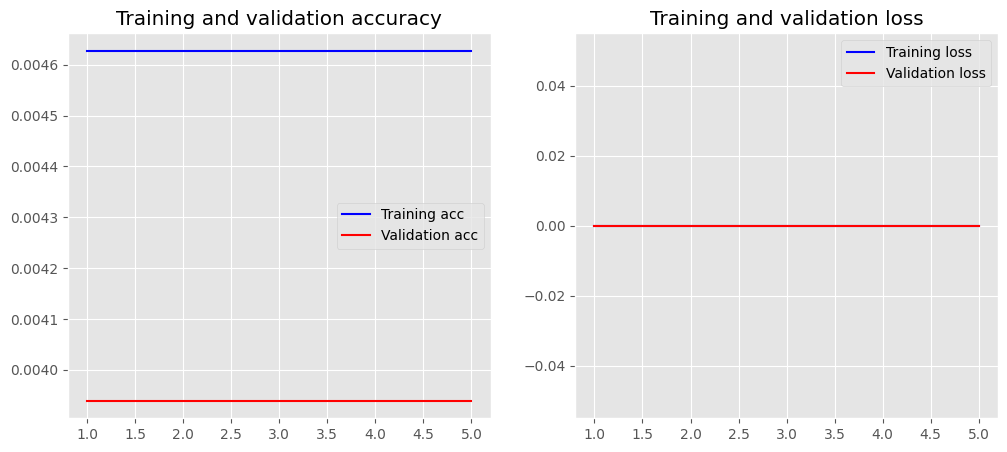

In [117]:
plot_history(history)

In [118]:
labels_train

array([27, 32, 28, ..., 32, 32, 32])